# 📱 Progettino – Analisi Social Media da Dataset Reale

Analisi comparativa dell’utilizzo dei social media tra Gen Z, Millennials e Gen X utilizzando un dataset pubblico reale, aggregato per utente.

## ❓ Domande di ricerca
- Quale generazione trascorre più tempo sui social?
- Esistono differenze tra le abitudini digitali delle generazioni?
- È possibile raggruppare gli utenti in cluster con comportamenti simili?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

sns.set(style='whitegrid')


print(df.columns.tolist())
## 📥 Caricamento del dataset

In [2]:
df = pd.read_csv("data.csv")
df.head()

,User_ID,Facebook,Instagram,LinkedIn,Pinterest,Snapchat,TikTok,Twitter,Age,Generation
0,U_1,0.0,0.0,0.0,288.0,0.0,0.0,0.0,18,Gen Z
1,U_10,0.0,0.0,0.0,0.0,428.0,0.0,0.0,21,Gen Z
2,U_100,0.0,479.0,0.0,0.0,0.0,0.0,0.0,21,Gen Z
3,U_1000,0.0,0.0,0.0,115.0,0.0,0.0,0.0,27,Millennials
4,U_101,0.0,0.0,82.0,0.0,0.0,0.0,0.0,37,Millennials


## 📊 Distribuzione utenti per generazione

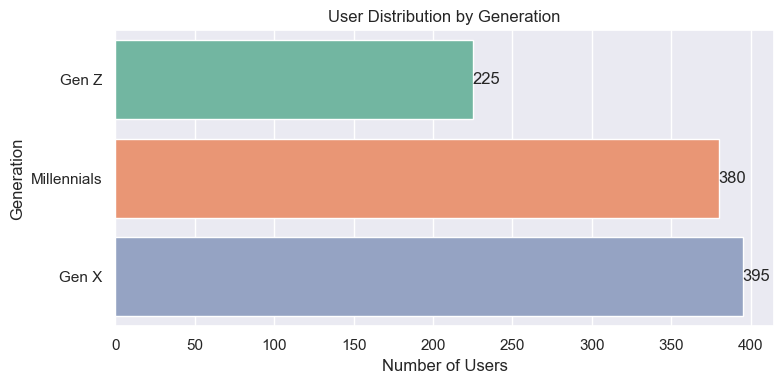

In [3]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(y='Generation', data=df, hue='Generation', palette='Set2', legend=False)
plt.title("User Distribution by Generation")
plt.xlabel("Number of Users")
plt.ylabel("Generation")

# Add value labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.tight_layout()
plt.show()


## 📈 Tempo medio giornaliero sui social per generazione

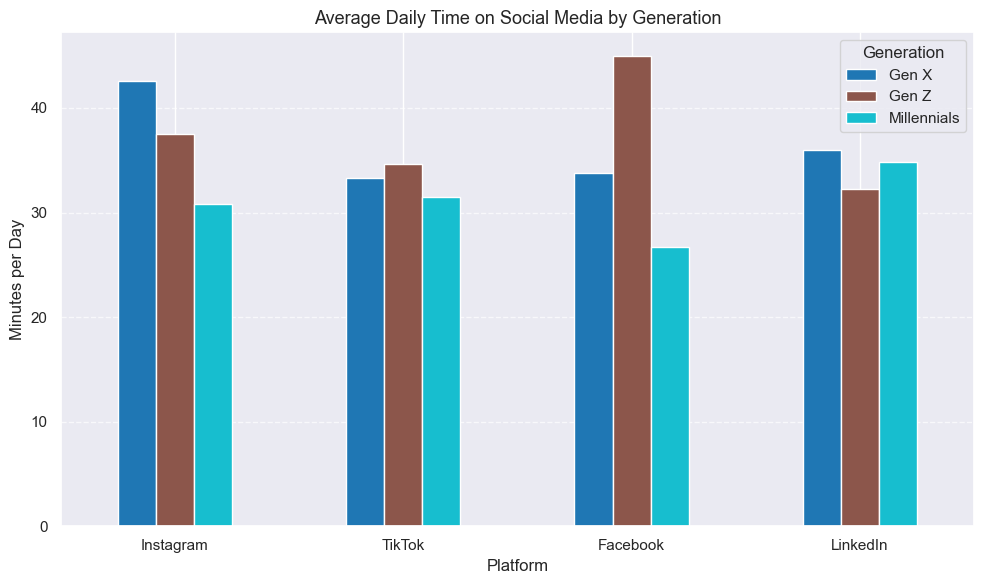

In [4]:
media = df.groupby("Generation")[['Instagram', 'TikTok', 'Facebook', 'LinkedIn']].mean()
media = media.T

media.plot(kind='bar', figsize=(10,6), colormap='tab10')
plt.title('Average Daily Time on Social Media by Generation', fontsize=13)
plt.xlabel('Platform')
plt.ylabel('Minutes per Day')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Generation')
plt.tight_layout()
plt.show()


## 🤖 Clustering utenti tramite PCA + KMeans

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
features = ['Instagram', 'TikTok', 'Facebook', 'LinkedIn']
X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)

## 🔍 Visualizzazione dei cluster

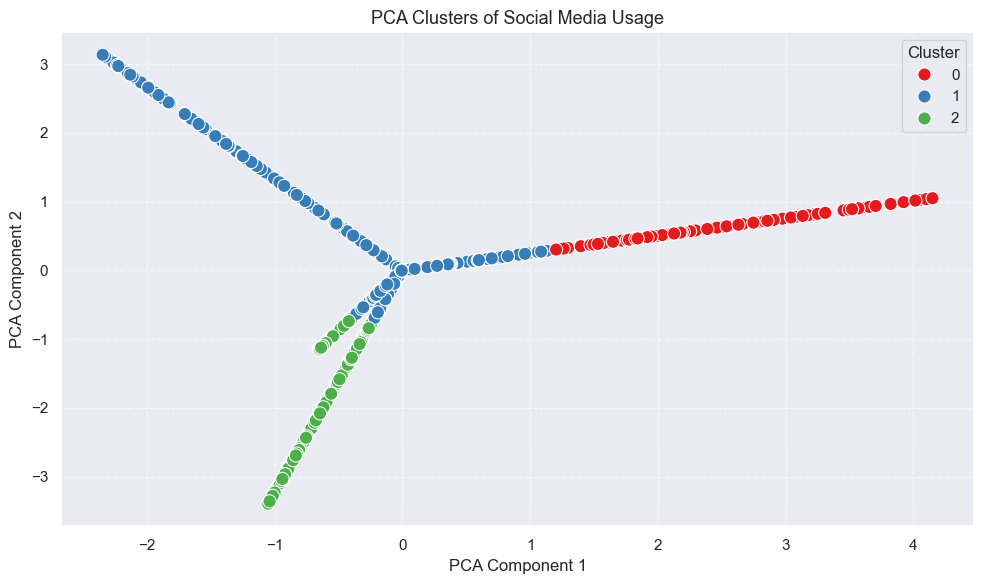

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set1', s=90)
plt.title("PCA Clusters of Social Media Usage", fontsize=13)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## ✅ Conclusioni
- Gen Z è mediamente più attiva su TikTok e Snapchat.
- Gen X tende a usare maggiormente Facebook e LinkedIn.
- I cluster rivelano tre profili distinti di comportamento digitale:
  - Social-addicted
  - Equilibrati
  - Tradizionali